In [190]:
from mpl_toolkits import mplot3d

In [191]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

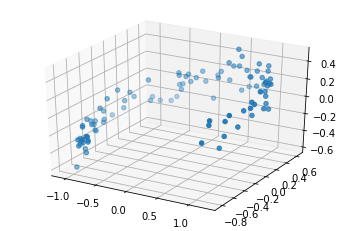

In [252]:
import numpy as np
def generate_data(m):

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    return data

X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');


In [253]:
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))

In [254]:

history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2340
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1880
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0676
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0454
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 13/200
4/4 [==============================] - 0s 1ms/st

In [255]:
codings = encoder.predict(X_train)



In [256]:
print(X_train[0])

[-0.21299546  0.26078946  0.03928145]


In [257]:
print(codings[0])

[-0.06192875  0.3592536 ]


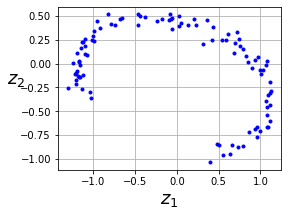

In [258]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

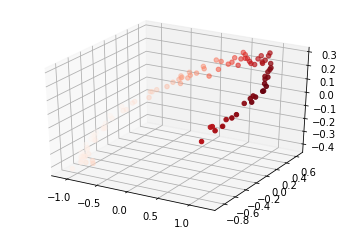

In [259]:
decodings = decoder.predict(codings)

ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');

In [244]:
print(X_train[:,2])
print(decodings[:,2])

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.70316386 0.6243271  0.7084652  0.6363875  0.6815106  0.6726479
 0.6434089  0.70470095 0.6240003  0.7074349  0.63848287 0.67870355
 0.6755077  0.6410074  0.70606875 0.6238692  0.7062229  0.6407083
 0.67584467 0.67833024 0.6387247  0.7072611  0.62393415 0.70483464
 0.6430538  0.67294693 0.68110263 0.6365708  0.70827234 0.6241949
 0.7032763  0.6455085  0.67002326 0.68381214 0.63455546 0.70909786
 0.6246501  0.70155483 0.6480614  0.6670868  0.68644655 0.63268775
 0.7097339  0.6252977  0.